In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data/Absenteeism_at_work.csv', sep = ';')
data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


## Univariate Analysis

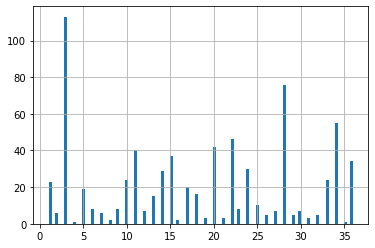

In [3]:
plt.figure()
data['ID'].hist(bins = 100)
plt.show()

There are 36 unique individuals in this data who have taken leaves for various reasons

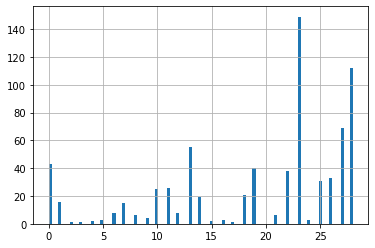

In [13]:
plt.figure()
data['Reason for absence'].hist(bins = 100)
plt.show()

Medical and dental consultation along with therapy seems to be the major reason for absence for these employees, although diseases of musculoskeletal system and connective tissue seems to also be pretty high. Probably should check if this problem is there only with old people or not. Again a few other common occurences include infectious diseases, Injury, poisoning and patient follow up.

As for the Injury and poisoning, we should probably check whether longer travel time leads to higher chances of injury or if being a social smoker or drinker can cause poisoning of some kind (Maybe even see if pets cause this issue?)

Should also check for a direct correlation between social smokers and respiratory diseases.

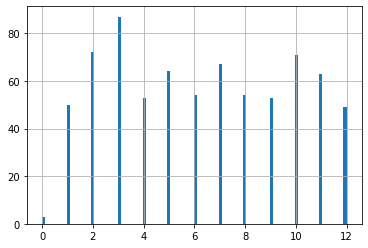

In [14]:
plt.figure()
data['Month of absence'].hist(bins = 100)
plt.show()

More or less balanced. Some entries are filled with 0, must investigate what that is. Maybe just some error in typing 10 or 1 but is surely possible that for some reason the month wasn't recorded. 

Also one thing to check here is do the social drinkers, who generally tend to drink more in the colder months of April-July, since Brazil is in the southern hemisphere, have more health related leaves during this time.

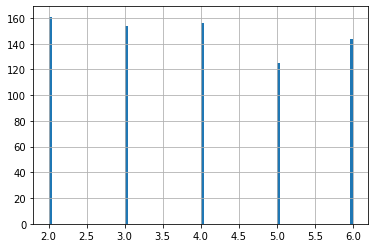

In [15]:
plt.figure()
data['Day of the week'].hist(bins = 100)
plt.show()

Sundays are off days and the distribution here is more or less evenly balanced. Should see why Thursdays see a dip in the number of leaves (still need to figure out how).

Should also search for instances where people took Saturday and Monday off continuously to convert to a long weekend and whether or not it was centred around a public holiday. Which leads me to one more thing, we should check if some of the unjustified absences are just a day before/after public holidays

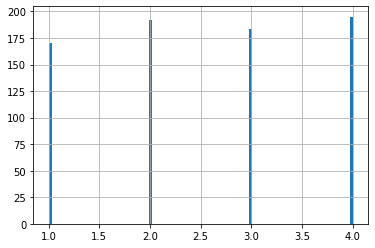

In [16]:
plt.figure()
data['Seasons'].hist(bins = 100)
plt.show()

Again pretty much nothing to say here, seasons are well balanced. Just want to test out the earlier "drinker takes more leaves in winter" theory

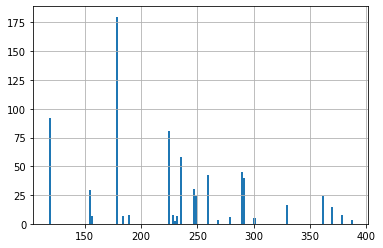

In [18]:
plt.figure()
data['Transportation expense'].hist(bins = 150)
plt.show()

Very uneven distribution. Should probably first group this down to a class of employees(like high or mid or low absenteeism) and check this distribution for each of them. Should give a better idea if it has some better trend. Can't make out anything from here

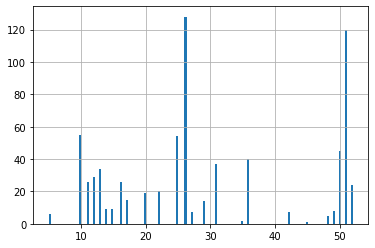

In [20]:
plt.figure()
data['Distance from Residence to Work'].hist(bins = 150)
plt.show()

Probably constant for each employee, should see if there is a change for a single employee, which will imply a change of residence in these three years which we can use to see if they had more leaves before the change or after the change or if any of it was centred around the change since everything needed to be moved from one house to another.

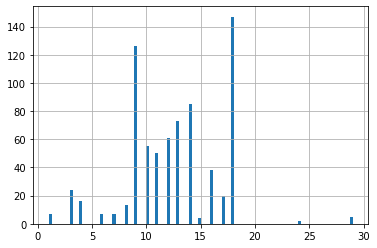

In [21]:
plt.figure()
data['Service time'].hist(bins = 100)
plt.show()

This is probably the service time in years, could use this to see if a person had more leaves in 2007-08, 08-09 or 09-10. Also should search for any major event which happened in Brazil during these years to see if there could be any reason for a person having more leaves (maybe some epidemic or natural calamity or something)

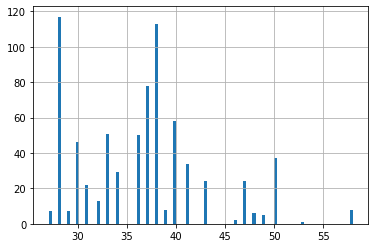

In [22]:
plt.figure()
data['Age'].hist(bins = 100)
plt.show()

More youngsters than old-timers who have leaves. Should definitely look into why this is happening. Could be multiple reasons. Maybe they have a higher workload which is causing more stress or maybe they have a lesser workload which means they have nothing to do on a few days. Or in general lifestyle choices are causing them to fall sick more often. Should look into all these reasons.

That being said, something which just popped into my mind, I noticed that there are really less number of instances of people who took leaves for Pregnancy and childbirth and stuff. Should definitely check how much such people are there and we could work towards figuring out the gender ratio when it comes to taking leaves. 

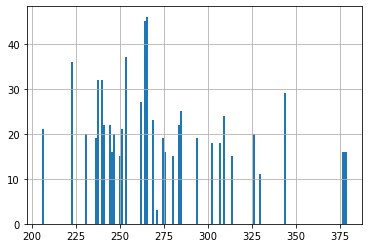

In [24]:
plt.figure()
data['Work load Average/day '].hist(bins = 150)
plt.show()

There is a trend to this distribution but I see some instances of people with a really high workload. Should check if the workload increases over time for any given individual and if increasing workload leads to more absenteeism or if it reduces it

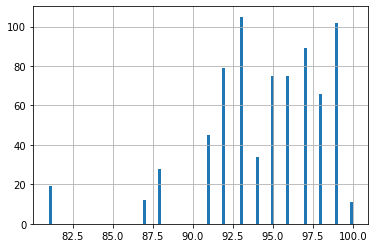

In [25]:
plt.figure()
data['Hit target'].hist(bins = 100)
plt.show()

In general there are more instances where people have met their targets. Since the time interval for meeting and resetting these targets is not specified, we can assume that these are actually weekly targets because that's the only number which looks respectable. Meeting 90 monthly targets in 3 years is not possible and 90 daily targets in 3 years makes it look like the courier company is underperforming like crazy.

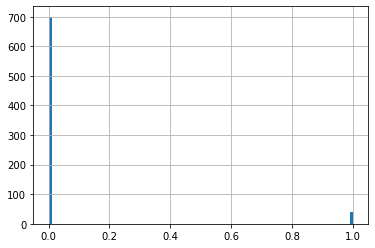

In [26]:
plt.figure()
data['Disciplinary failure'].hist(bins = 100)
plt.show()

Should check how many people have disciplinary failure and whether or not it is associated with them being a social drinker, smoker or with more diseases or anything of the sort

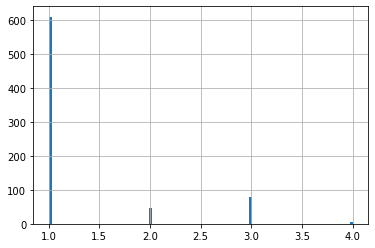

In [27]:
plt.figure()
data['Education'].hist(bins = 100)
plt.show()

More number of high school graduates have been employed here and this gets me to think of one thing. Is it more of a survival thing for these people and do people with a lot of education prefer not to work in this sector? Or is it only that the ones with more education tend to take lesser leaves? Well idk how we can figure that out from this data but will surely try to see if it's possible

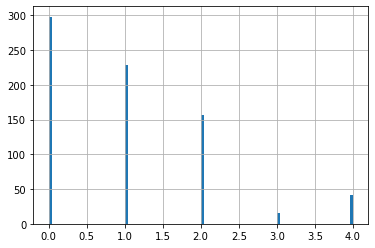

In [28]:
plt.figure()
data['Son'].hist(bins = 100)
plt.show()

Shows that with an increasing number of sons, in general, people take lesser leaves since they wan to earn and be able to provide for their families. But this trend stops at 3 sons after which the employee also needs to go and take care of their child since looking after all of them and handling the job will be hard.

Should try to see if there is an increase/decrease in the number of targets hit or increase/decrease in workload as the number of sons increase

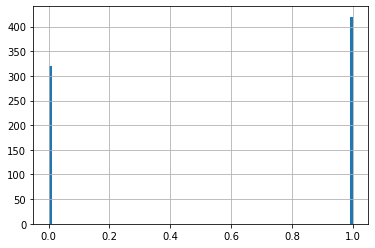

In [29]:
plt.figure()
data['Social drinker'].hist(bins = 100)
plt.show()

This column shows that a good deal of the employees are social drinkers and is going to be extensively used to check a lot of hypothesis made earlier

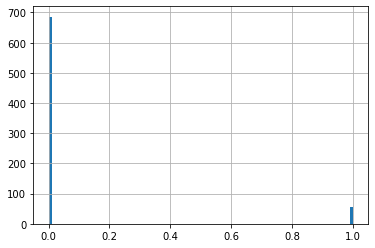

In [30]:
plt.figure()
data['Social smoker'].hist(bins = 100)
plt.show()

Not a lot of instances where a social smoker has taken leaves, but still should give a check to see in general do these people belong to the high, mid or low absenteeism class

Can also check if these people have higher/lower targets met or not

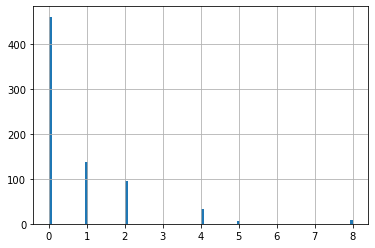

In [31]:
plt.figure()
data['Pet'].hist(bins = 100)
plt.show()

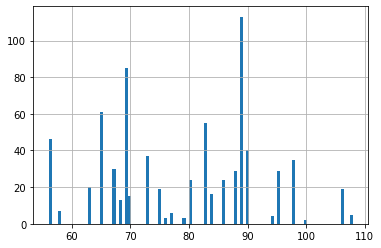

In [32]:
plt.figure()
data['Weight'].hist(bins = 100)
plt.show()

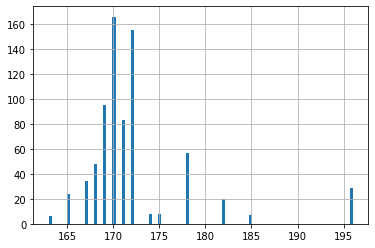

In [33]:
plt.figure()
data['Height'].hist(bins = 100)
plt.show()

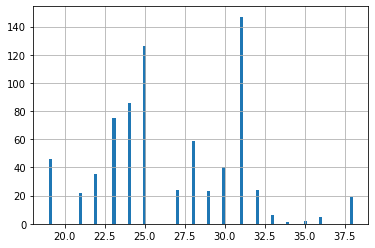

In [34]:
plt.figure()
data['Body mass index'].hist(bins = 100)
plt.show()

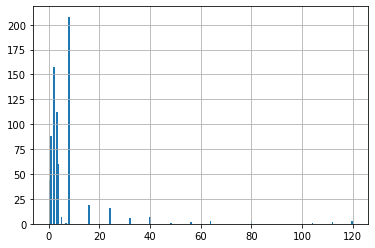

In [36]:
plt.figure()
data['Absenteeism time in hours'].hist(bins = 200)
plt.show()

In [4]:
ID_Group = data.groupby(['ID'])
ID_Group.first()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
1,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8
2,18,8,5,1,235,29,12,48,205.917,92,0,1,1,0,1,5,88,163,33,8
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
5,19,9,3,1,235,20,13,43,241.476,92,0,1,1,1,0,0,106,167,38,8
6,11,7,5,1,189,29,13,33,239.554,97,0,1,2,0,0,2,69,167,25,8
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
8,0,9,3,1,231,35,14,39,294.217,81,1,1,2,1,0,2,100,170,35,0
9,18,8,3,1,228,14,16,58,265.615,94,0,1,2,0,0,1,65,172,22,8


In [5]:
num_absent = ID_Group.size()
num_absent

ID
1      23
2       6
3     113
4       1
5      19
6       8
7       6
8       2
9       8
10     24
11     40
12      7
13     15
14     29
15     37
16      2
17     20
18     16
19      3
20     42
21      3
22     46
23      8
24     30
25     10
26      5
27      7
28     76
29      5
30      7
31      3
32      5
33     24
34     55
35      1
36     34
dtype: int64

In [6]:
pd.set_option('display.max_rows', 300)
vals = data.groupby(['ID','Reason for absence']).size()
vals

ID  Reason for absence
1   0                      1
    1                      1
    7                      1
    11                     1
    13                     3
    14                     1
    18                     1
    19                     1
    21                     1
    22                     4
    23                     4
    25                     2
    26                     2
2   0                      2
    18                     2
    23                     1
    28                     1
3   0                      1
    5                      1
    6                      1
    10                     2
    11                     7
    12                     1
    13                    10
    18                     2
    21                     2
    23                    19
    25                     2
    26                     1
    27                    38
    28                    26
4   0                      1
5   0                      5
    13              

In [7]:
ID_1 = ID_Group.get_group(1)
ID_1.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
9,22,7,2,1,235,11,14,37,239.554,97,0,3,1,0,0,1,88,172,29,8
32,23,8,5,1,235,11,14,37,205.917,92,0,3,1,0,0,1,88,172,29,4
101,26,12,4,4,235,11,14,37,261.306,97,0,3,1,0,0,1,88,172,29,8
202,7,4,6,3,235,11,14,37,326.452,96,0,3,1,0,0,1,88,172,29,3
229,13,6,6,3,235,11,14,37,377.550,94,0,3,1,0,0,1,88,172,29,16


In [8]:
low_absent = pd.DataFrame()
mid_absent = pd.DataFrame()
high_absent = pd.DataFrame()

for i in range(len(data)):
    ID = data.iloc[i,0]
    absent = num_absent[ID]
    if absent < 25:
        low_absent = low_absent.append(data.iloc[i,:])
    elif absent<50:
        mid_absent = mid_absent.append(data.iloc[i,:])
    else:
        high_absent = high_absent.append(data.iloc[i,:])

print(len(low_absent), len(mid_absent), len(high_absent))

238 258 244


## Multivariate

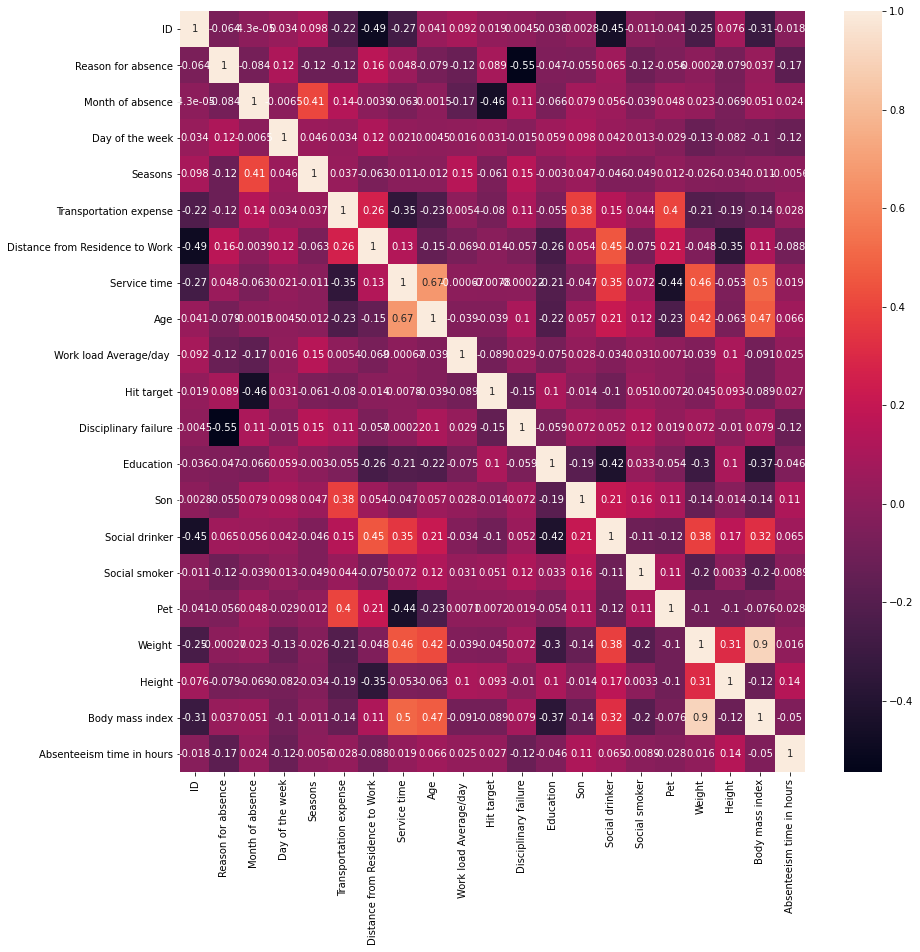

In [9]:
plt.figure(figsize = (14,14))
sns.heatmap(data.corr(), annot = True)
plt.show()

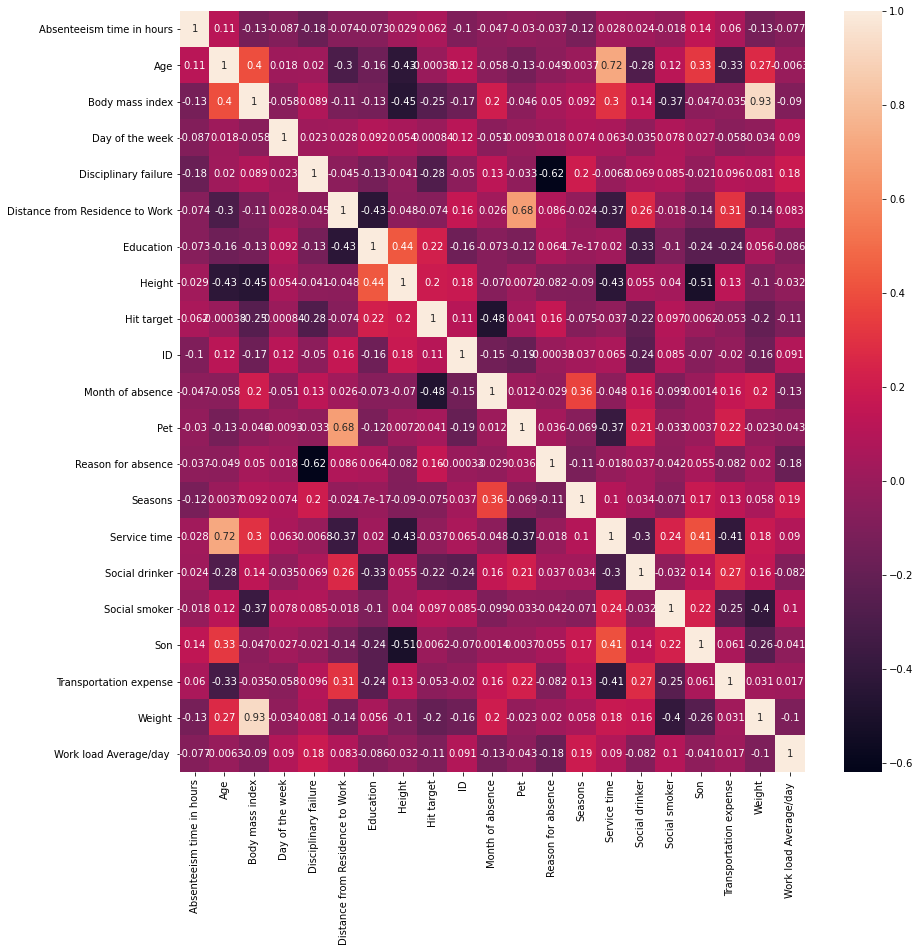

In [10]:
plt.figure(figsize = (14,14))
sns.heatmap(low_absent.corr(), annot = True)
plt.show()

In [12]:
mid_absent.groupby(['ID']).size()

ID
11.0    40
14.0    29
15.0    37
20.0    42
22.0    46
24.0    30
36.0    34
dtype: int64

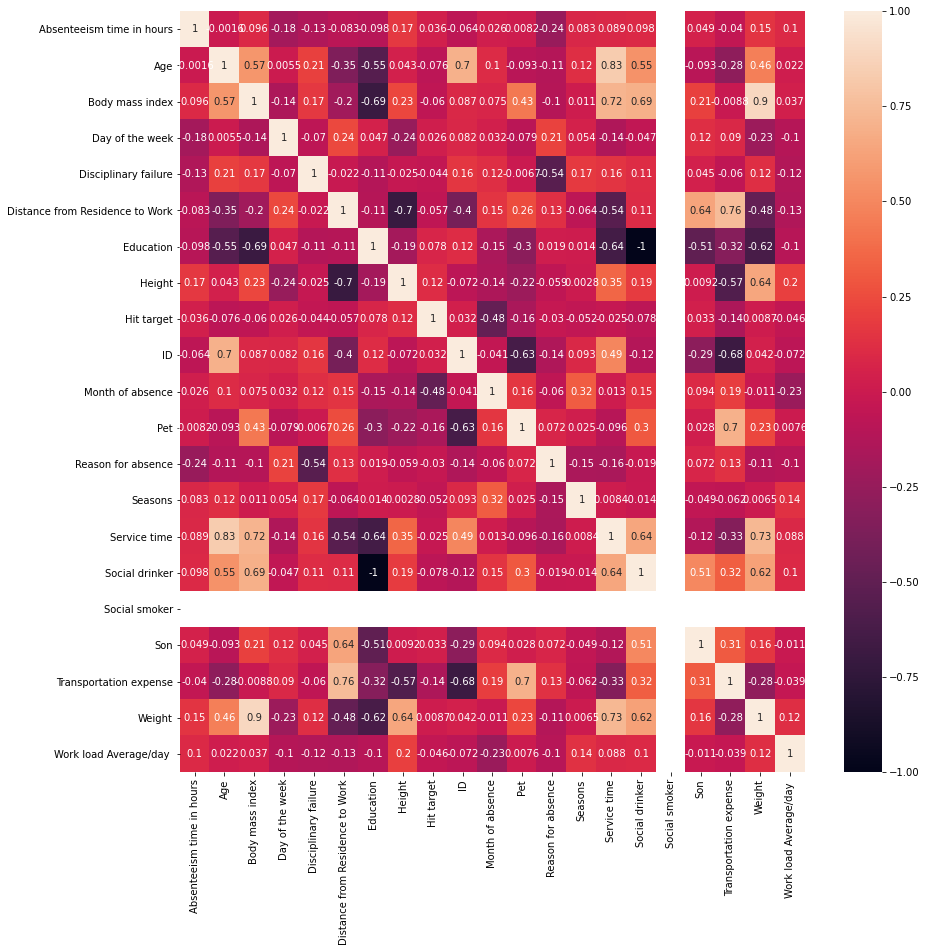

In [11]:
plt.figure(figsize = (14,14))
sns.heatmap(mid_absent.corr(),annot = True)
plt.show()

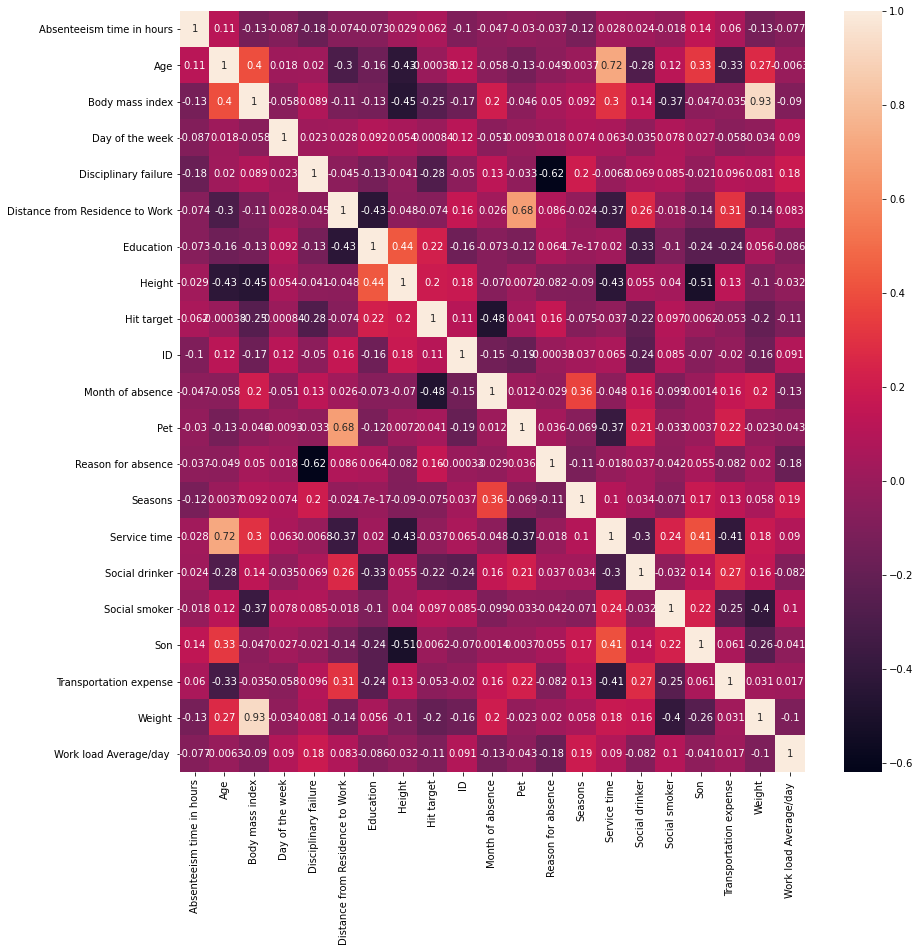

In [37]:
plt.figure(figsize = (14,14))
sns.heatmap(low_absent.corr(),annot = True)
plt.show()

<Figure size 1152x1152 with 0 Axes>

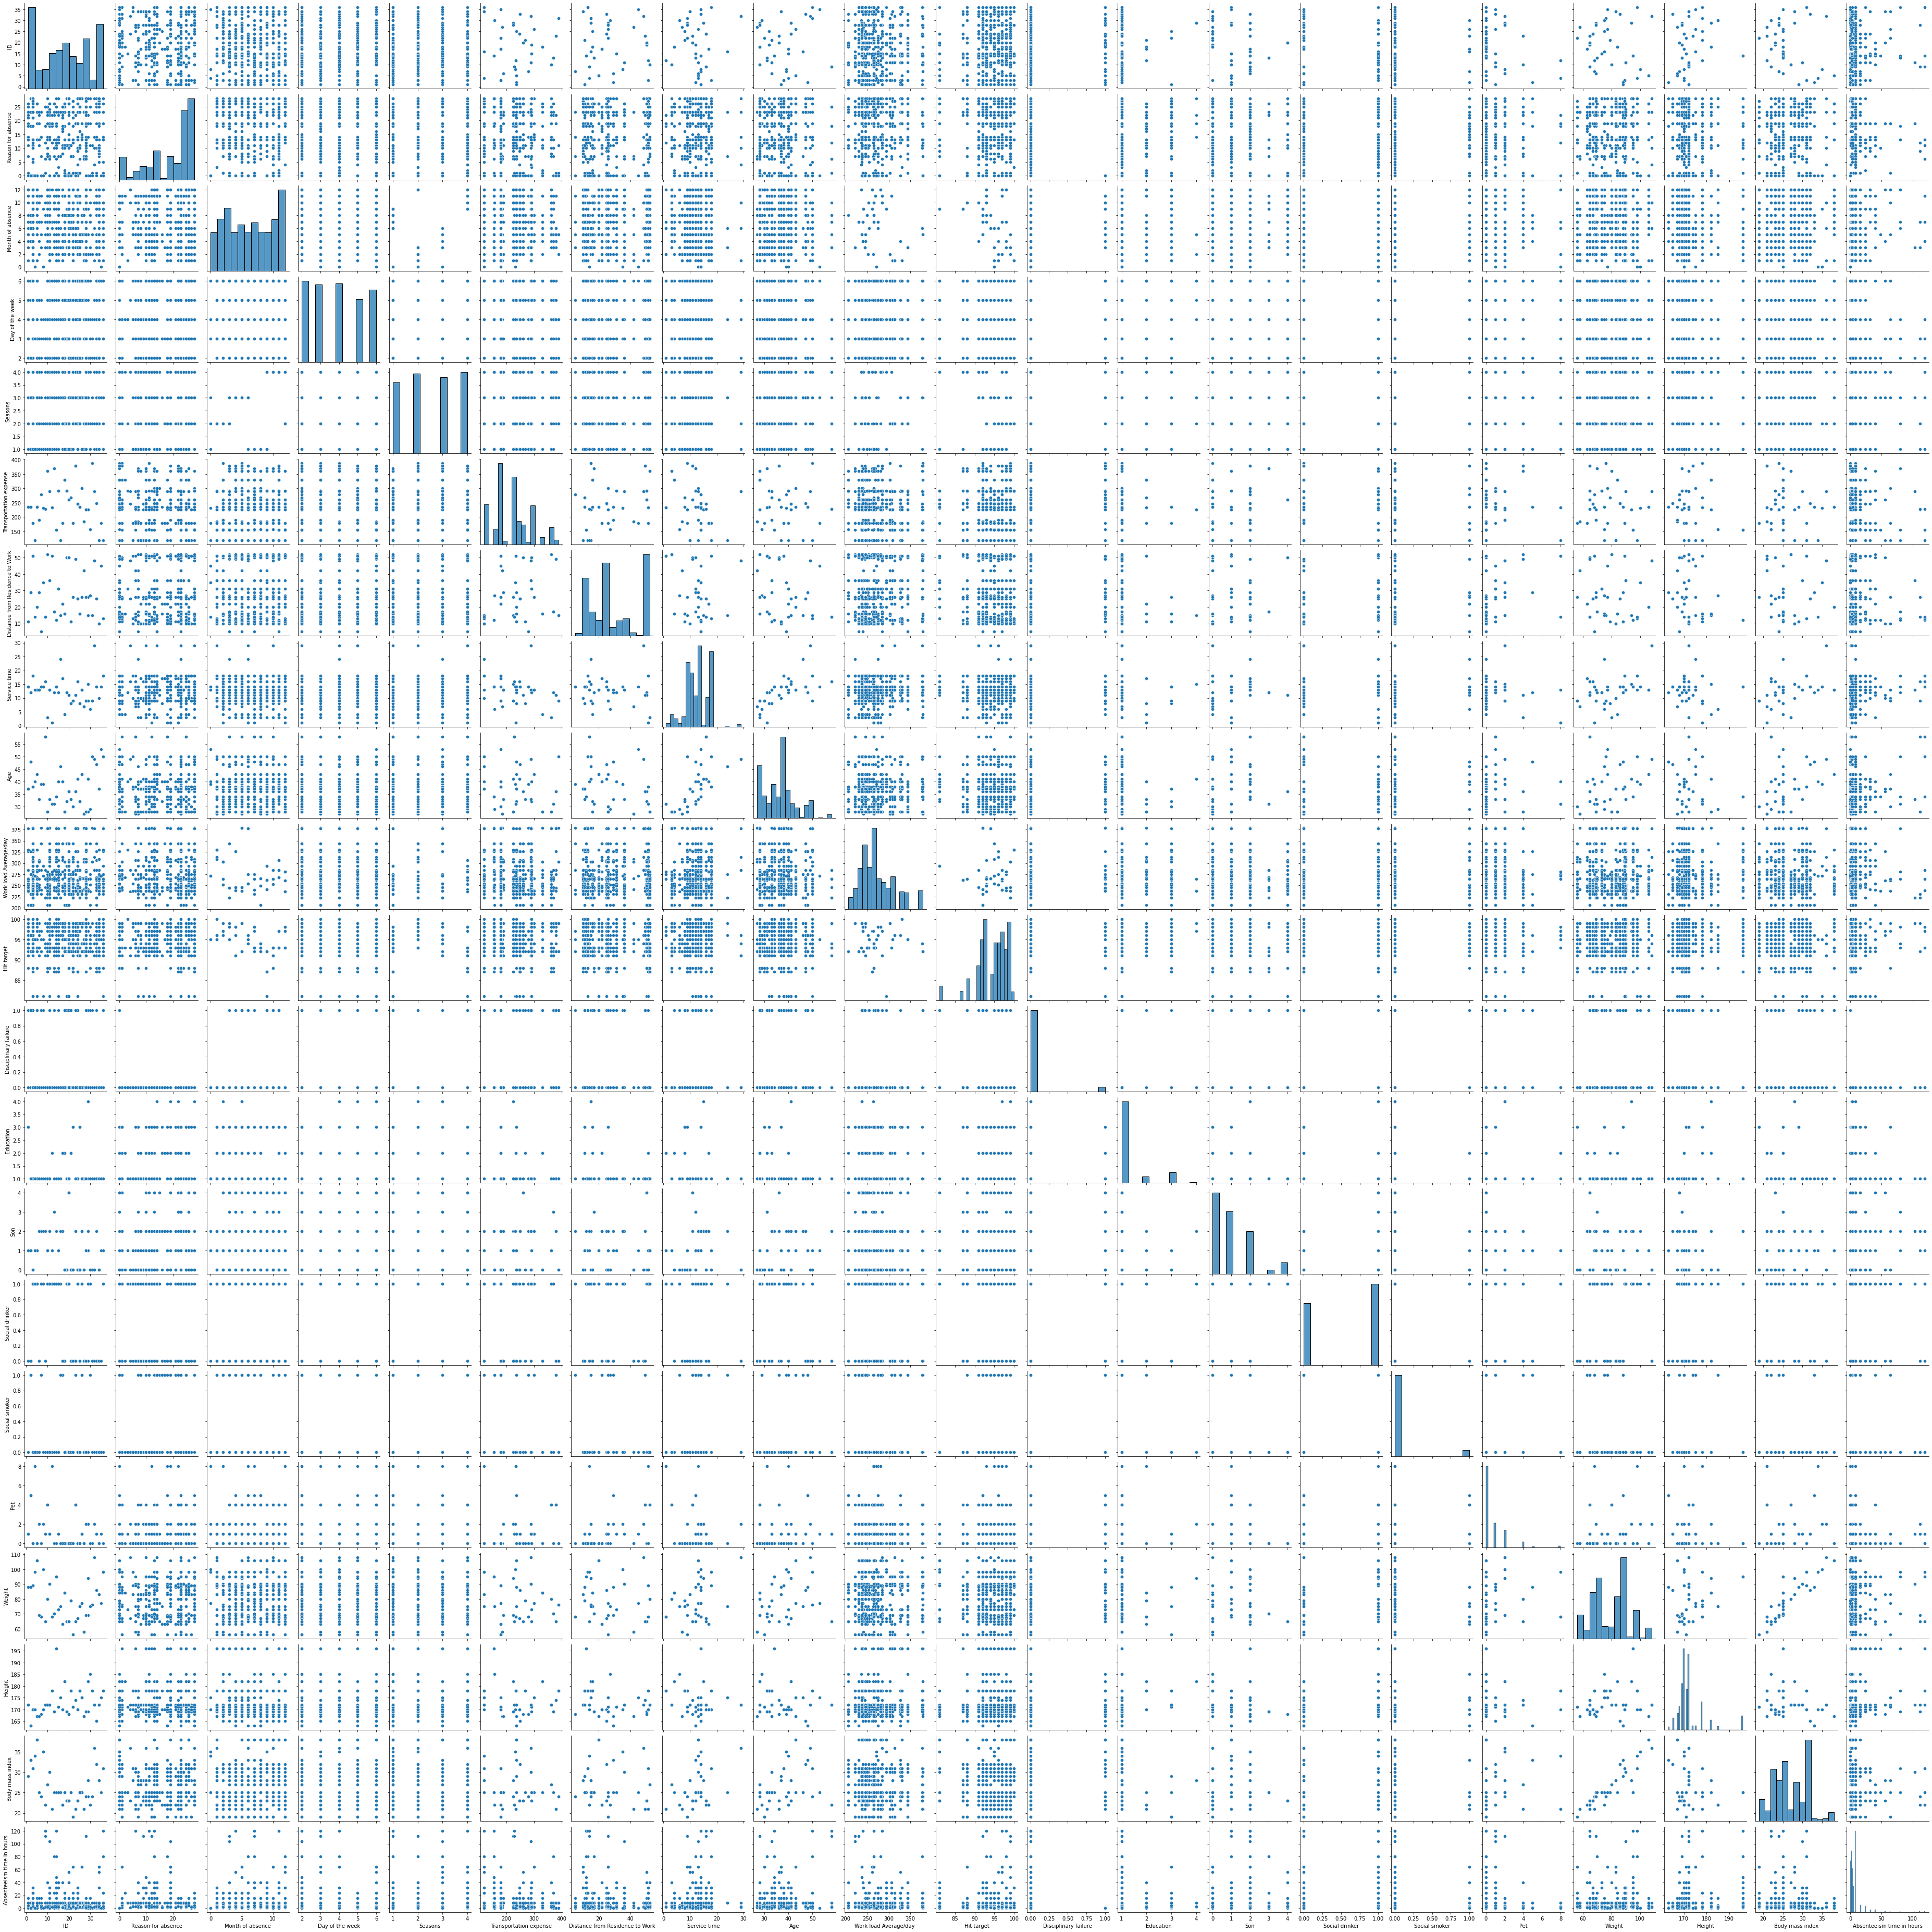

In [19]:
plt.figure(figsize = (16,16))
sns.pairplot(data)
plt.show()